In [1]:
import rsa
import pandas as pd
import time
import matplotlib.pyplot as plt
import numpy as np

C:\Users\Haygen Tsoi\AppData\Local\Temp\ipykernel_7356\359332957.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Experiment on Key Size

In [2]:
def experiment(size):
    start = time.time()
    (publickey, privatekey) = rsa.newkeys(size)
    time_taken = (time.time() - start)
    return time_taken

key_gen_time = []
size = []
security = []
schemes = []

### 1024 bits (80 bits for Symmetric Key Size)

In [3]:
time_taken = experiment(1024)
key_gen_time.append(time_taken)
size.append(1024)
security.append(80)
schemes.append("1024")
time_taken

0.43949174880981445

### 2048 bits (112 bits for Symmetric Key Size)

In [4]:
time_taken = experiment(2048)
key_gen_time.append(time_taken)
size.append(2048)
security.append(112)
schemes.append("2048")
time_taken

7.0309107303619385

### 3072 bits (128 bits for Symmetric Key Size)

In [5]:
time_taken = experiment(3072)
key_gen_time.append(time_taken)
size.append(3072)
security.append(128)
schemes.append("3072")
time_taken

8.89483904838562

### 7680 bits (192 bits for Symmetric Key Size)

In [6]:
# time_taken = experiment(7680)
# key_gen_time.append(time_taken)
key_gen_time.append(10000)
size.append(7680)
security.append(192)
schemes.append("7680")
# time_taken

### 15360 bits (256 bits for Symmetric Key Size)

In [7]:
# time_taken = experiment(15360)
# key_gen_time.append(time_taken)
key_gen_time.append(10000)
size.append(15360)
security.append(256)
schemes.append("15360")
# time_taken

## Plotting

C:\Users\Haygen Tsoi\AppData\Local\Temp\ipykernel_7356\4055388611.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[1].annotate(txt, (df['Security(in bits)'][i], df['Key Size (in bits)'][i]))


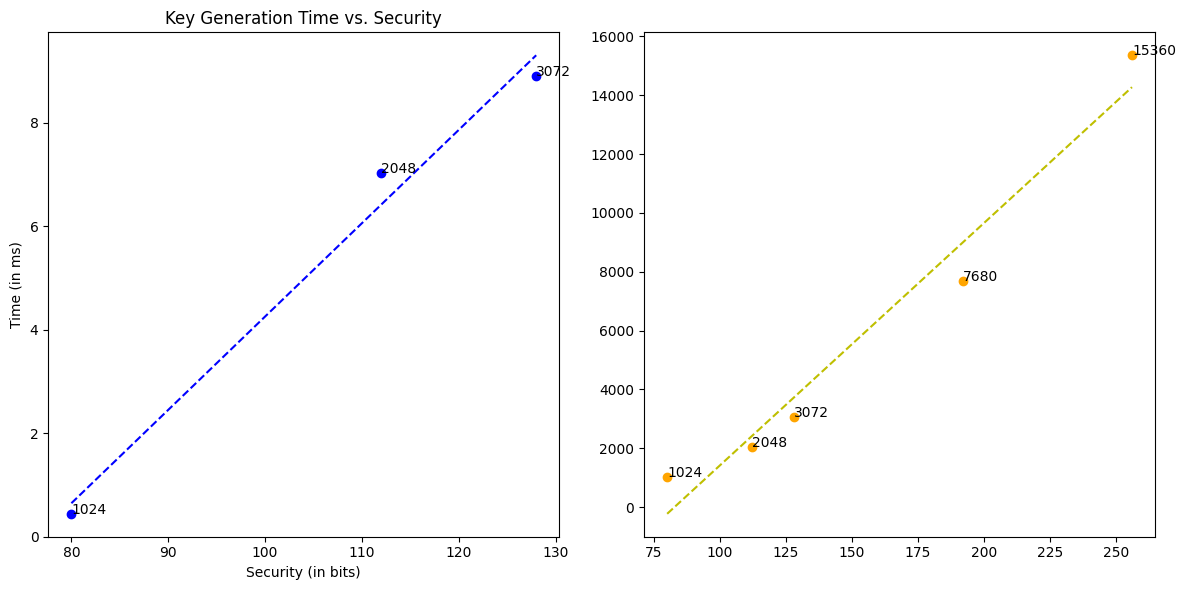

In [8]:

df = pd.DataFrame({
    'Time(in ms)': key_gen_time,
    'Security(in bits)': security,
    'Key Size (in bits)': size,
}, index=schemes)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

threshold = 1000
filtered_df = df[df['Time(in ms)'] < threshold]
axes[0].scatter(filtered_df['Security(in bits)'], filtered_df['Time(in ms)'], color='blue')
axes[0].set_title('Key Generation Time vs. Security')
axes[0].set_xlabel('Security (in bits)')
axes[0].set_ylabel('Time (in ms)')

# Annotate the filtered points
for i, txt in enumerate(filtered_df['Key Size (in bits)']):
    axes[0].annotate(txt, (filtered_df['Security(in bits)'].iloc[i], filtered_df['Time(in ms)'].iloc[i]))

# Fit and plot a trend line for the filtered data
z = np.polyfit(filtered_df['Security(in bits)'], filtered_df['Time(in ms)'], 1)
p = np.poly1d(z)
axes[0].plot(filtered_df['Security(in bits)'], p(filtered_df['Security(in bits)']), "b--")

# Plot 'Size(in bytes)' vs. 'Key Size(in bits)' for df
axes[1].scatter(df['Security(in bits)'], df['Key Size (in bits)'], color='orange')
# Annotate points from df
for i, txt in enumerate(df.index):
    axes[1].annotate(txt, (df['Security(in bits)'][i], df['Key Size (in bits)'][i]))

z = np.polyfit(df['Security(in bits)'], df['Key Size (in bits)'], 1)
p = np.poly1d(z)
axes[1].plot(df['Security(in bits)'], p(df['Security(in bits)']), "y--")



plt.tight_layout()
plt.show()
